In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML 341/Bank_Personal_Loan_Modelling.csv')

In [ ]:
import matplotlib.pyplot as plt

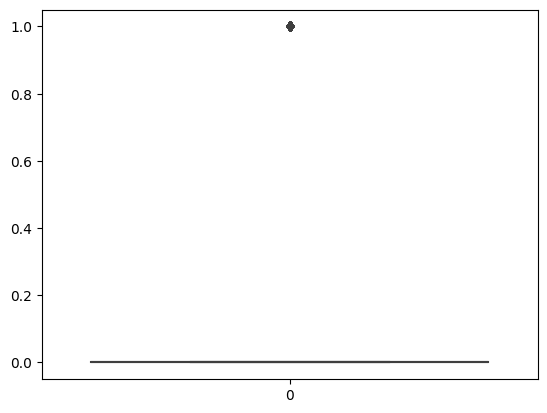

In [ ]:
sns.boxplot(df['Personal Loan'])
plt.show()

<ipython-input-12-9aa90146512d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=10,ax=axis[0,0])
<ipython-input-12-9aa90146512d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'],ax=axis[0,1],color='orange')
<ipython-input-12-9aa90146512d>:4: UserWarning: 

`distp

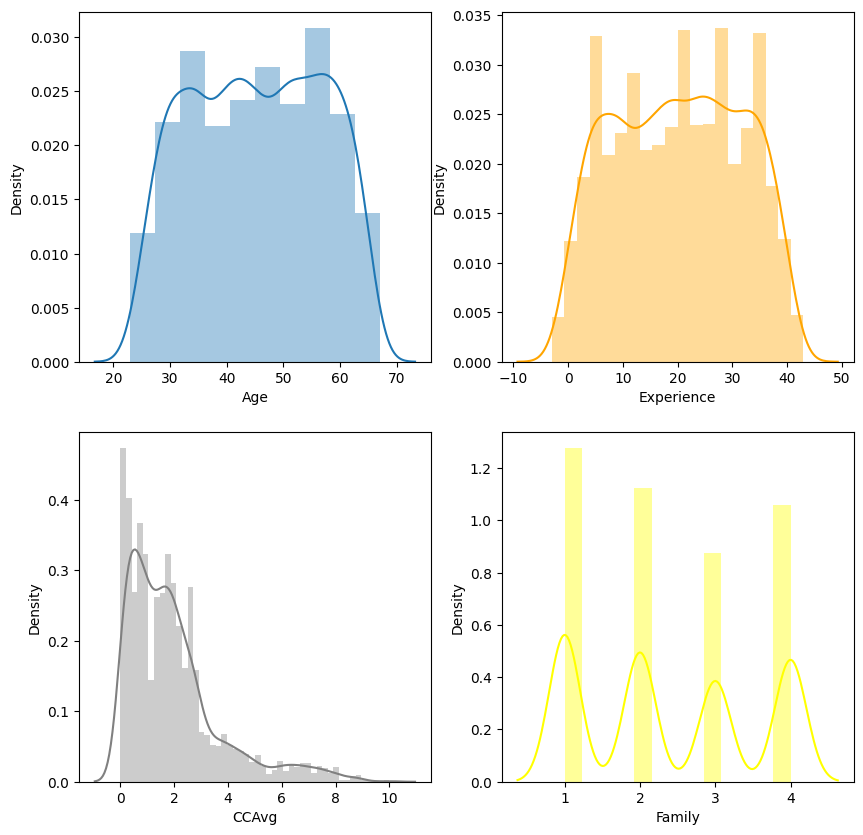

In [ ]:
fig, axis =plt.subplots(2,2,figsize=(10,10),sharex=False)
sns.distplot(df['Age'],bins=10,ax=axis[0,0])
sns.distplot(df['Experience'],ax=axis[0,1],color='orange')
sns.distplot(df['CCAvg'],ax=axis[1,0],color='gray')
sns.distplot(df['Family'],ax=axis[1,1],color='yellow')
plt.show()

In [ ]:
df['Income']=df['Income']/12
df['Mortgage']=df['Mortgage']/10

IndexError: ignored

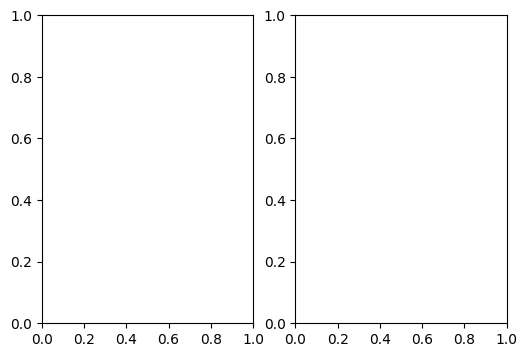

In [ ]:
fig, axis =plt.subplots(1,2,figsize=(6,4),sharex=False)
sns.distplot(df['Income'],bins=10,ax=axis[0,0])
sns.distplot(df['Mortgage'],ax=axis[0],color='green')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

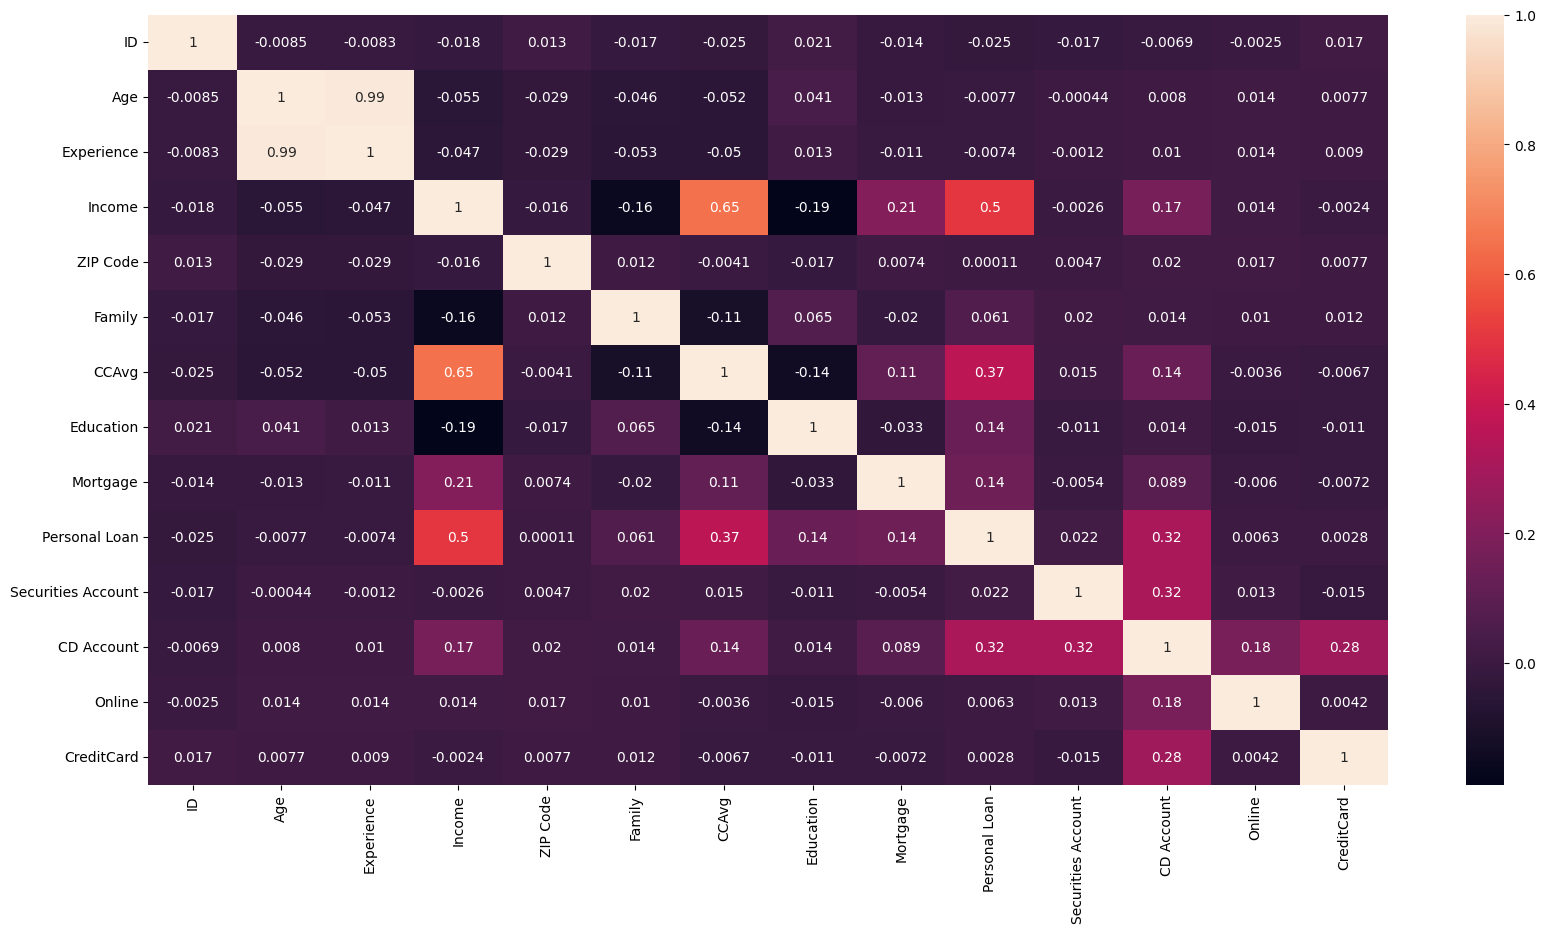

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [ ]:
x=df.drop(['Personal Loan'],axis=1)
y=df['Personal Loan']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logiR=LogisticRegression()
logiR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
logiR_test=logiR.predict(x_test)

In [ ]:
print("classification report")
print(classification_report(y_test,logiR_test))

classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1340
           1       0.57      0.31      0.40       160

    accuracy                           0.90      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



In [ ]:
logiR_predict_train=logiR.predict_proba(x_train)[:,1]>0.8
logiR_predict_test=logiR.predict_proba(x_test)[:,1]>0.8


In [ ]:
print("classification report")
cm=classification_report(y_test,logiR_predict_test,labels=[1,0])
print(cm)

classification report
              precision    recall  f1-score   support

           1       0.40      0.01      0.02       160
           0       0.89      1.00      0.94      1340

    accuracy                           0.89      1500
   macro avg       0.65      0.51      0.48      1500
weighted avg       0.84      0.89      0.85      1500



In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gnb_predict_test=logiR.predict_proba(x_test)[:,1]>0.8
cm=classification_report(y_test,gnb_predict_test,labels=[1,0])
print(cm)

              precision    recall  f1-score   support

           1       0.40      0.01      0.02       160
           0       0.89      1.00      0.94      1340

    accuracy                           0.89      1500
   macro avg       0.65      0.51      0.48      1500
weighted avg       0.84      0.89      0.85      1500

